In [1]:
import SimpleITK as sitk
import numpy as np
import os

In [2]:
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))

In [3]:
def evaluate_dice(ground_truth_folder, prediction_folder):
    dice_scores = []
    ious=[]
    
    for file in os.listdir(ground_truth_folder):
        if file.endswith(".nrrd"):
            gt_path = os.path.join(ground_truth_folder, file)
            pred_path = os.path.join(prediction_folder, file)  # Adjust naming

            if not os.path.exists(pred_path):
                print(f"Skipping {file} (no prediction found)")
                continue

            # Load images
            gt_img = sitk.ReadImage(gt_path)
            pred_img = sitk.ReadImage(pred_path)

            gt_array = sitk.GetArrayFromImage(gt_img).astype(np.uint8)
            pred_array = sitk.GetArrayFromImage(pred_img).astype(np.uint8)

            # Compute Dice Score
            dice = dice_coefficient(gt_array, pred_array)
            dice_scores.append(dice)
            
            iou = dice / (2 - dice)
            ious.append(iou)
            print(f"{file}: Dice Score = {dice:.4f}, IoU = {iou:.4f}")
            

    print(f"\nMean Dice Score: {np.mean(dice_scores):.4f}, mean IoU: {np.mean(ious):.4f}")

In [4]:
ground_truth_folder = "/raid/mpsych/CACTAS/DATA/nnUNet_raw/Dataset001_ESUS/labelsTs"
prediction_folder = "/raid/mpsych/CACTAS/DATA/nnUNet_test_output_2D"

In [5]:
for file in os.listdir(prediction_folder):
    if file.endswith(".nrrd"):
        img = sitk.ReadImage(os.path.join(prediction_folder, file))
        img_array = sitk.GetArrayFromImage(img)
        unique_values = np.unique(img_array)
        print(f"{file}: Unique values = {unique_values}")

066.nrrd: Unique values = [0 1]
059.nrrd: Unique values = [0 1]
068.nrrd: Unique values = [0]
058.nrrd: Unique values = [0 1]
065.nrrd: Unique values = [0 1]
060.nrrd: Unique values = [0 1]
067.nrrd: Unique values = [0 1]
069.nrrd: Unique values = [0 1]
063.nrrd: Unique values = [0 1]
061.nrrd: Unique values = [0 1]
064.nrrd: Unique values = [0 1]
057.nrrd: Unique values = [0 1]
070.nrrd: Unique values = [0 1]
062.nrrd: Unique values = [0 1]


In [6]:
evaluate_dice(ground_truth_folder, prediction_folder)

066.nrrd: Dice Score = 0.6970, IoU = 0.5349
059.nrrd: Dice Score = 0.5876, IoU = 0.4160
068.nrrd: Dice Score = 0.0000, IoU = 0.0000
058.nrrd: Dice Score = 0.8857, IoU = 0.7949
065.nrrd: Dice Score = 0.7800, IoU = 0.6393
060.nrrd: Dice Score = 0.8603, IoU = 0.7548
067.nrrd: Dice Score = 0.6753, IoU = 0.5098
069.nrrd: Dice Score = 0.8212, IoU = 0.6966
063.nrrd: Dice Score = 0.8025, IoU = 0.6701
061.nrrd: Dice Score = 0.7731, IoU = 0.6301
064.nrrd: Dice Score = 0.7775, IoU = 0.6359
057.nrrd: Dice Score = 0.6504, IoU = 0.4819
070.nrrd: Dice Score = 0.9025, IoU = 0.8223
062.nrrd: Dice Score = 0.7295, IoU = 0.5742

Mean Dice Score: 0.7102, mean IoU: 0.5829


In [7]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
def visualize_segmentation(original_path, gt_path, pred_path, slice_range):
    # Load original image
    original_img = sitk.ReadImage(original_path)
    original_array = sitk.GetArrayFromImage(original_img)
    
    # Load ground truth
    gt_img = sitk.ReadImage(gt_path)
    gt_array = sitk.GetArrayFromImage(gt_img)
    
    # Load prediction
    pred_img = sitk.ReadImage(pred_path)
    pred_array = sitk.GetArrayFromImage(pred_img)
    
    for slice_idx in range(slice_range[0], slice_range[1]):
        # Select a slice
        img_slice = original_array[slice_idx, :, :]
        gt_slice = gt_array[slice_idx, :, :]
        pred_slice = pred_array[slice_idx, :, :]
        
        # Create RGB image for overlay
        overlay = np.stack([img_slice] * 3, axis=-1)  # Convert grayscale to RGB
        overlay = (overlay - overlay.min()) / (overlay.max() - overlay.min()) * 255  # Normalize to 0-255
        overlay = overlay.astype(np.uint8)
        
        # Overlay Prediction in red (without changing grayscale background)
        overlay[..., 0][pred_slice > 0] = 255  # Red channel for Prediction
        overlay[..., 1][pred_slice > 0] = 0    # No green
        overlay[..., 2][pred_slice > 0] = 0    # No blue
        
        # Plot
        fig, axes = plt.subplots(1, 4, figsize=(15, 5))
        
        axes[0].imshow(img_slice, cmap='gray')
        axes[0].set_title("Original")
        
        axes[1].imshow(gt_slice, cmap='gray')
        axes[1].set_title("Ground Truth")
        
        axes[2].imshow(pred_slice, cmap='gray')
        axes[2].set_title("Prediction")
        
        axes[3].imshow(overlay)
        axes[3].set_title("Overlay (Pred=Red)")
        
        for ax in axes:
            ax.axis('off')
        
        plt.show()


In [9]:
# Example usage
original_path = "/raid/mpsych/CACTAS/DATA/nnUNet_raw/Dataset001_ESUS/imagesTs/057_0000.nrrd"
gt_path = "/raid/mpsych/CACTAS/DATA/nnUNet_raw/Dataset001_ESUS/labelsTs/057.nrrd"
pred_path = "/raid/mpsych/CACTAS/DATA/nnUNet_test_output_2D/057.nrrd"

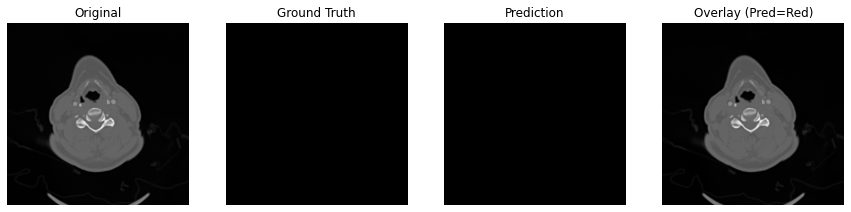

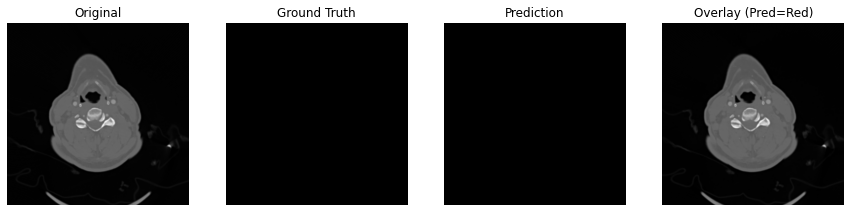

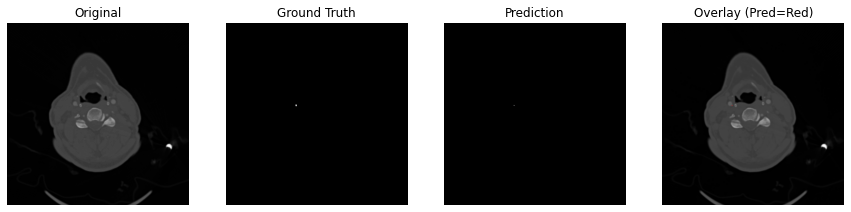

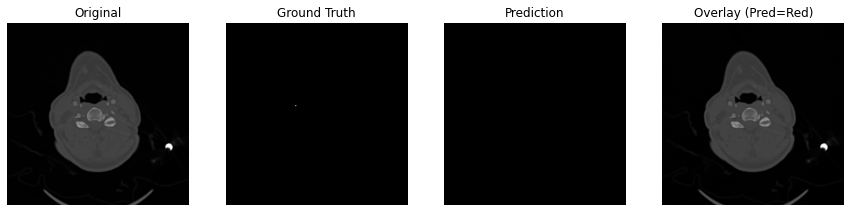

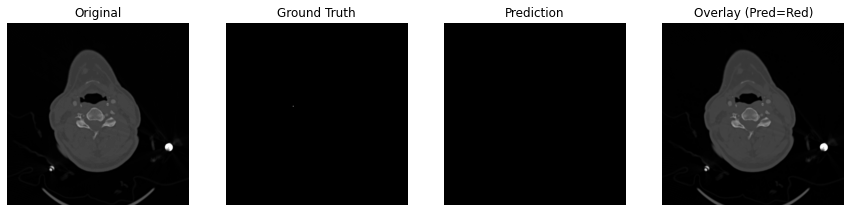

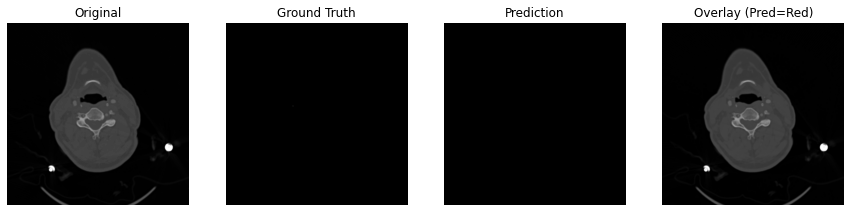

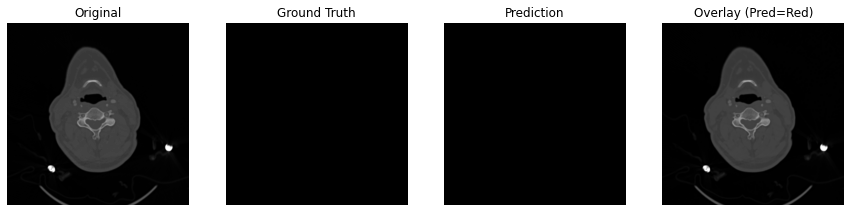

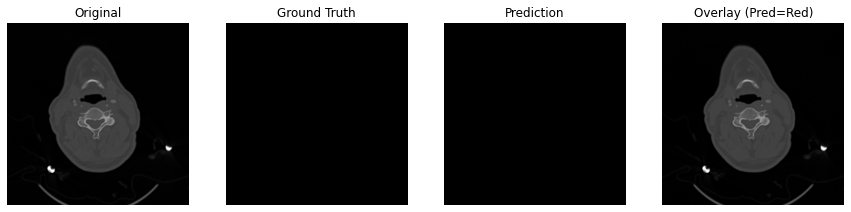

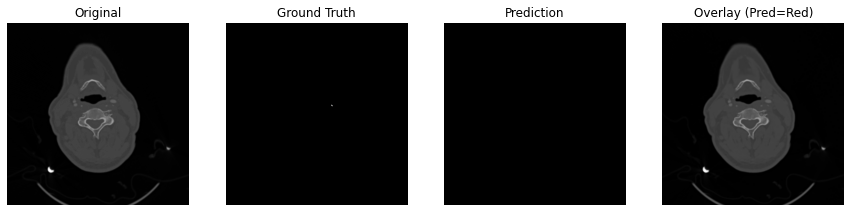

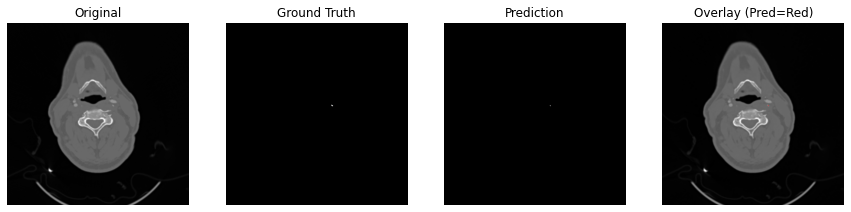

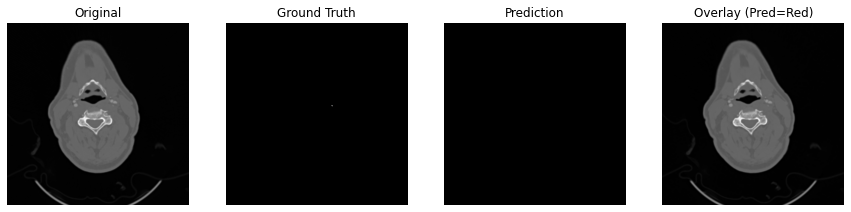

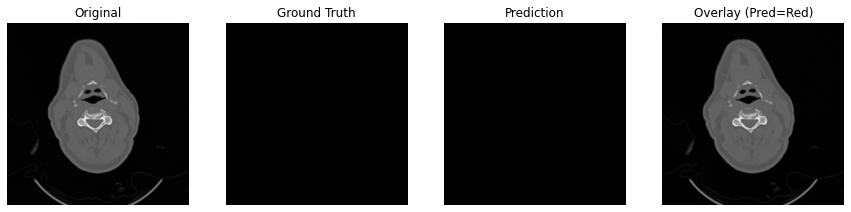

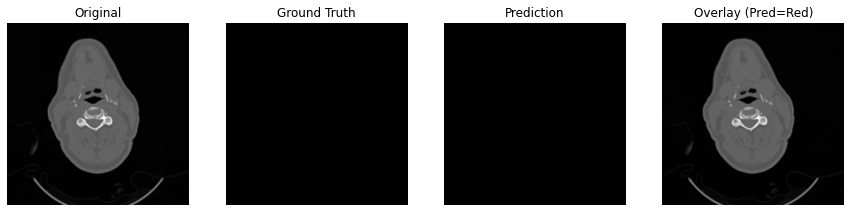

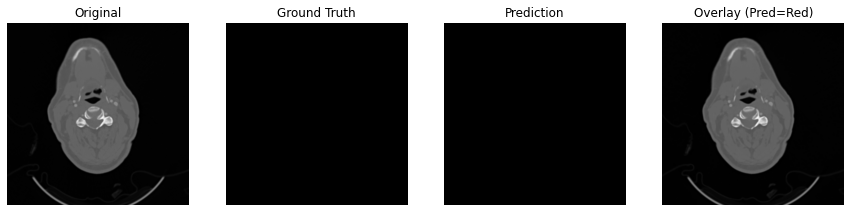

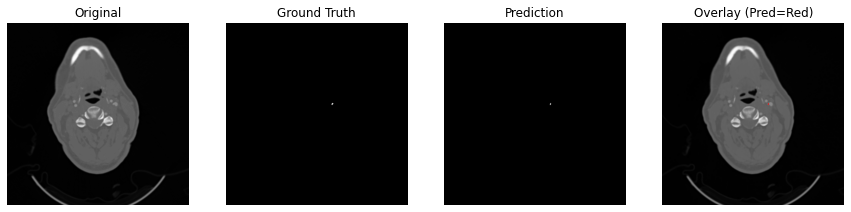

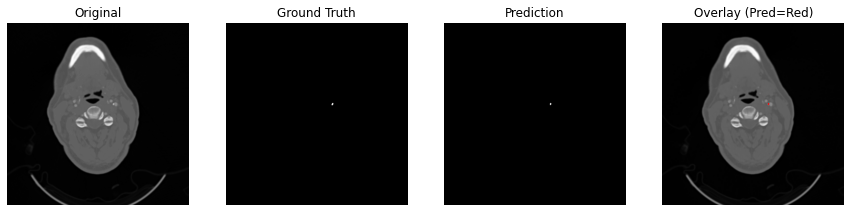

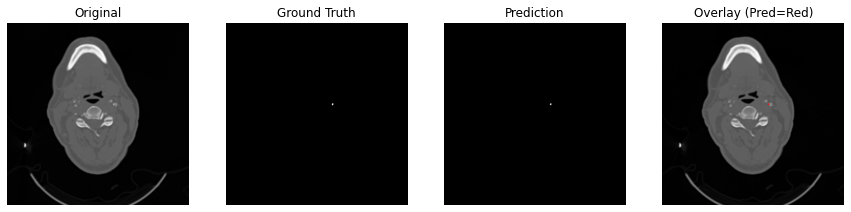

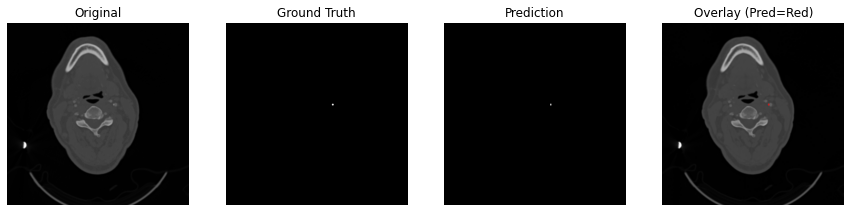

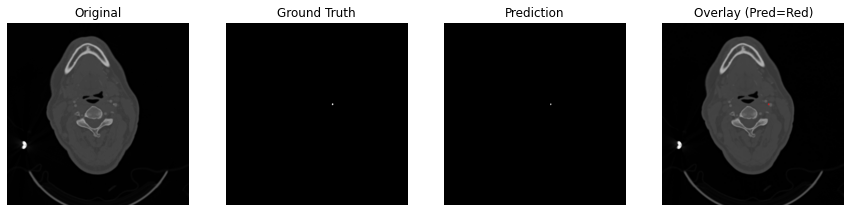

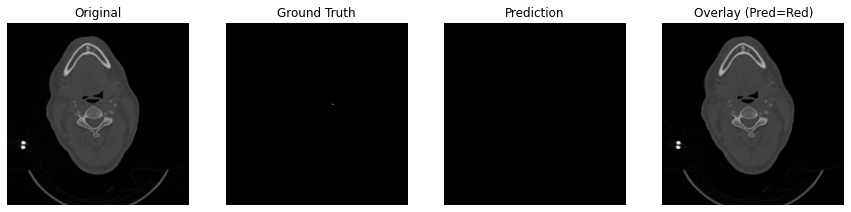

In [10]:
visualize_segmentation(original_path, gt_path, pred_path, slice_range=(110, 130))